# Predicting Coupon Acceptance in Driving Scenarios: Optimizing Targeted Marketing

### Problem Statement

A leading coupon distribution company, "CouponsOnWheels," is eager to enhance its marketing strategies and optimize coupon distribution to a diverse range of drivers. Their recent campaign, which offered various coupons in different driving scenarios, saw varying acceptance rates. Now, they seek to reduce marketing costs and target their offers more effectively.

The company has data from a pilot campaign where they distributed coupons to a random sample of 12864 drivers. Among the sample, 7210 drivers accepted the coupons while others didn't. "CouponsOnWheels" wants to leverage this data to develop a predictive model that identifies which drivers are more likely to accept coupons, thereby reducing marketing expenses.

The company has shared the following details:

They spent 10 dollars  on each coupon promotion.
They earned 100 dollars in profit for each driver who accepted the coupon.
There are an additional 50,000 drivers in their database who have not yet received any promotions.
"CouponsOnWheels" is seeking a data-driven solution that helps them pinpoint the drivers most likely to accept coupons, thereby minimizing costs and maximizing revenue. They want to employ your expertise to create an effective predictive model for targeted coupon distribution.

The challenge is to develop a model that accurately predicts which drivers are likely to accept coupons in various driving scenarios. By doing so, "CouponsOnWheels" aims to minimize marketing expenses and maximize the ROI from coupon campaigns.

This project is an opportunity to contribute to evidence-based marketing decisions and support "CouponsOnWheels" in its endeavor to streamline coupon distribution and provide relevant offers to their customers, ultimately benefiting both the company and its customer base.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("raw_data.csv")

In [3]:
df.shape

(12684, 26)

In [4]:
df['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

In [5]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [6]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

### Data Dictionary

1.	Destination: The destination of the individual while driving, categorized as either "No Urgent Place," "Home," or "Work."

2.	Passenger: The presence and type of passengers in the car, including "Alone," "Friend(s)," "Kid(s)," or "Partner."

3.	Weather: The weather conditions at the time, classified as "Sunny," "Rainy," or "Snowy."

4.	Temperature: The temperature conditions, with values such as "55," "80," and "30" representing different temperature ranges.

5.	Time: The time of day when the driving scenario occurs, specified as "2PM," "10AM," "6PM," "7AM," or "10PM."

6.	Coupon: The type of coupon being offered, with categories like "Restaurant(<$20)," "Coffee House," "Carry out & Take away," "Bar," and "Restaurant($20-$50)."

7.	Expiration: The time duration until the coupon expires, either "1 day" or "2 hours."

8.	Gender: The gender of the individual, categorized as "Female" or "Male."

9.	Age: The age group of the individual, including values such as "21," "46," "26," and others.

10.	Marital Status: The marital status of the individual, with categories like "Unmarried partner," "Single," "Married partner," "Divorced," and "Widowed."

11.	Has Children: A binary indicator, "1" if the individual has children and "0" if they do not.

12.	Education: The highest level of education attained by the individual, with categories including "Some college - no degree," "Bachelors degree," "Associates degree," and more.

13.	Occupation: The occupation of the individual, with various job categories such as "Unemployed," "Architecture & Engineering," "Student," and many others.

14.	Income: The income range of the individual, such as "$37500 - $49999," "$62500 - $74999," and other income categories.

15.	Bar: The frequency of visits to a bar every month, with values like "never," "less1," "18."

16.	CoffeeHouse: The frequency of visits to a coffeehouse every month, categorized as "never," "less1," "43," "gt8," and "nan."

17.	CarryAway: The frequency of getting take-away food every month, with values like "n43," "gt8," "less1," and "never."

18.	RestaurantLessThan20: The frequency of visits to a restaurant with an average expense per person of less than $20 every month, with categories including "43," "less1," "gt8," and "never."

19.	Restaurant20To50: The frequency of visits to a restaurant with an average expense per person of $20 - $50 every month, with categories like "18," and "nan."

20.	toCoupon_GEQ15min: A binary indicator, "0" if the driving distance to the restaurant/bar for using the coupon is not greater than 15 minutes and "1" if it is greater.

21.	toCoupon_GEQ25min: A binary indicator, "0" if the driving distance to the restaurant/bar for using the coupon is not greater than 25 minutes and "1" if it is greater.

22.	direction_same: A binary indicator, "0" if the restaurant/bar is not in the same direction as the current destination and "1" if it is in the same direction.

23.	direction_opp: A binary indicator, "1" if the restaurant/bar is in the opposite direction as the current destination and "0" if it is not.

24.	Y: A binary indicator, "1" if the coupon is accepted and "0" if it is not.

In [7]:
# Missing Values percentage
df.isnull().sum()/df.shape[0]*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

> The "car" column has over 99 percent of null values. So dropping of this column as this is not of use
> The columns "Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50" have less than 2 percent of null values. So imputing these columns with mode or mean

In [8]:
# Dropping the car column with 99 percent of null values
df.drop("car", axis = 1, inplace = True)

In [9]:
# Imputing the null values with mode
for col in ["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]:
    df[col] = df[col].fillna(df[col].mode()[0])

### Feature Engineering

> Lets see the data types of each column

In [10]:
df.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

> It seems most of the columns here are categorical, so lets have a look at the unique categories in each of these columns.

In [11]:
for col in df.columns: # df.select_dtypes(include='object'):
    print(f"{col} : {df[col].unique()} \n")

destination : ['No Urgent Place' 'Home' 'Work'] 

passanger : ['Alone' 'Friend(s)' 'Kid(s)' 'Partner'] 

weather : ['Sunny' 'Rainy' 'Snowy'] 

temperature : [55 80 30] 

time : ['2PM' '10AM' '6PM' '7AM' '10PM'] 

coupon : ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)'] 

expiration : ['1d' '2h'] 

gender : ['Female' 'Male'] 

age : ['21' '46' '26' '31' '41' '50plus' '36' 'below21'] 

maritalStatus : ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed'] 

has_children : [1 0] 

education : ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School'] 

occupation : ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Person

#### From the above:

> The column direction_same is exactly opposite to the column direction_opp so dropping direction_opp.

In [12]:
df.drop("direction_opp", axis = 1, inplace = True)

> The columns "toCoupon_GEQ5min", "toCoupon_GEQ15min", "toCoupon_GEQ25min" represents the driving distance to the restaurant/bar for using the coupon. These three columns can be eliminated to generate a new column -> "distance_in_time"

In [13]:
def calculate_distance_in_time(row):
    if row['toCoupon_GEQ25min'] == 1:
        return ">25"
    elif row['toCoupon_GEQ15min'] == 1:
        return ">15"
    elif row['toCoupon_GEQ5min'] == 1:
        return ">5"
    else:
        return "<5"
    
df['distance_in_time'] = df.apply(calculate_distance_in_time, axis=1)
df.drop(["toCoupon_GEQ5min", "toCoupon_GEQ15min", "toCoupon_GEQ25min"], axis = 1, inplace = True)

> The columns 'RestaurantLessThan20' and 'Restaurant20To50' represents frequency of visits to a restaurant with an average expense per person of less than 20 dollars and in between 20 and 50 dollars every month. Instead we can create a new column from these columns: avg_revenue_per_month

In [14]:
# step1 - Modifying the column values to average frequency
label_encode1 = {
    "never" : 0,
    "less1" : 0.5,
    "1~3"   : 2, 
    "4~8"   : 6,
    "gt8"   : 10
}

df['RestaurantLessThan20'] = df['RestaurantLessThan20'].map(label_encode1)
df['Restaurant20To50'] = df['Restaurant20To50'].map(label_encode1)

# Step2 - Creating new "avg_revenue_per_month" column from frequencies and dropping unnecessary columns
df['avg_revenue_per_month'] = (0+20)/2 * df['RestaurantLessThan20'] + (20+50)/2 * df['Restaurant20To50']
df.drop(['RestaurantLessThan20', 'Restaurant20To50'], axis = 1, inplace = True)

> The columns "Bar", "CoffeeHouse", "CarryAway" also have ordinal values similar to "RestaurantLessThan20". So Label encoding them to ordinal values.

In [15]:
for col in ["Bar", "CoffeeHouse", "CarryAway"]:
    df[col] = df[col].map(label_encode1)  # using the same labelencode1 dictionary

> The column "income" is also an ordinal variable in the form of classes. So label encoding it into ordinal values

In [16]:
df.income.value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

In [17]:
label_encode2 = {
    'Less than $12500': 1,
    '$12500 - $24999': 2,
    '$25000 - $37499': 3,
    '$37500 - $49999': 4,
    '$50000 - $62499': 5,
    '$62500 - $74999': 6,
    '$75000 - $87499': 7,
    '$87500 - $99999': 8,
    '$100000 or More': 9
}

df['income'] = df['income'].map(label_encode2)

In [18]:
df['income'].value_counts()

3    2013
2    1831
4    1805
9    1736
5    1659
1    1042
8     895
7     857
6     846
Name: income, dtype: int64

> Also the column "education" is a ordinal variable. Hence, label encoding it.

In [19]:
label_encode3 = {
    
    'Some college - no degree': 0,
    'Some High School': 1,
    'High School Graduate': 1,
    'Bachelors degree': 2,
    'Associates degree': 3,
    'Graduate degree (Masters or Doctorate)': 4,
    
}

df['education'] = df['education'].map(label_encode3)

> Similarly, The column "age" is also an ordinal variable in the form of classes. So label encoding it into ordinal values

In [20]:
label_encode4 = {
    '21': 21,
    '46': 46,
    '26': 26,
    '31': 31,
    '41': 41,
    '50plus': 51,  # Encode '50plus' as 51
    '36': 36,
    'below21': 20  # Encode 'below21' as 20
}

df['age'] = df['age'].map(label_encode4)

> The "occupation" column is having very high number of categories which are nominal. One hot Encoding them just result increasing the number of columns ultimately increase in the model complexity. So dropping this column as well.

In [21]:
df.drop("occupation", axis = 1, inplace = True)

> The rest of the columns look good for me, but as they are nominal categorical variables, can perform one hot encoding to these columns for data selection after deriving some insights 

## Data Insights

### Distribution of Target Variable

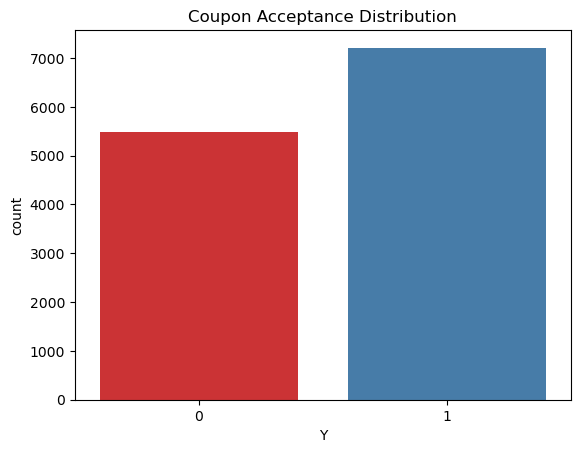

In [22]:
sns.countplot(data=df, x='Y', palette=sns.color_palette("Set1"))
plt.title('Coupon Acceptance Distribution')
plt.show()

In [23]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'direction_same', 'Y', 'distance_in_time', 'avg_revenue_per_month'],
      dtype='object')

In [24]:
ordinal_cols = ['education','distance_in_time','expiration','income']
nominal_cols = ['gender','has_children','destination','passanger','direction_same', 'weather']

Frequency Analysis:


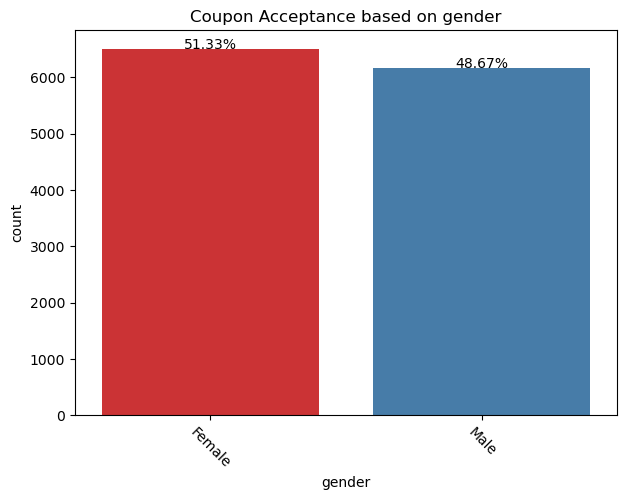

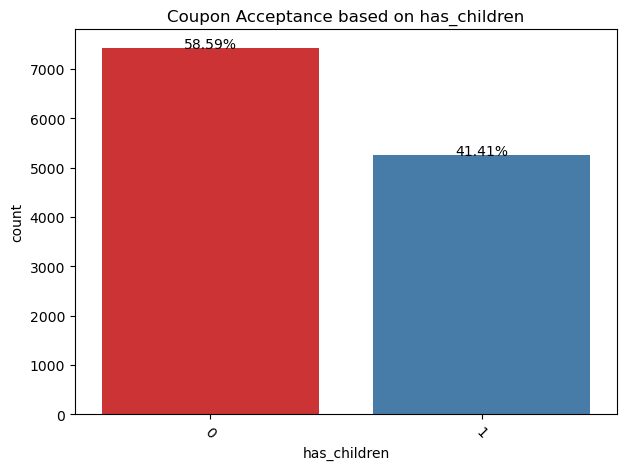

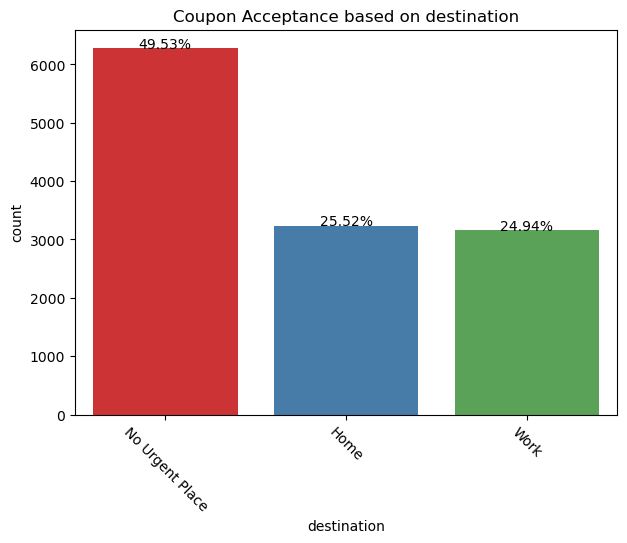

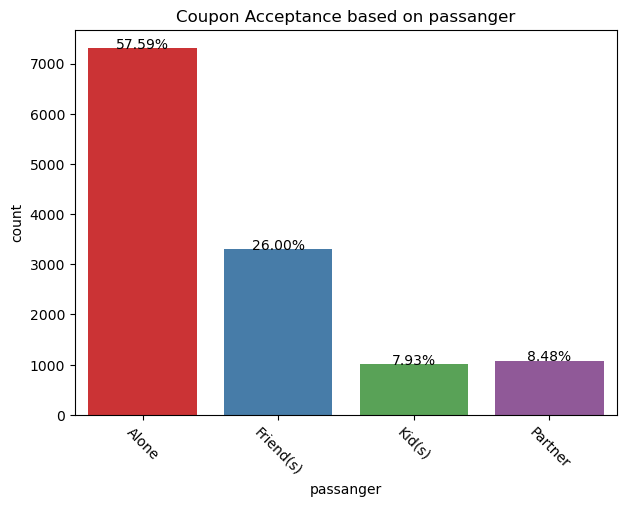

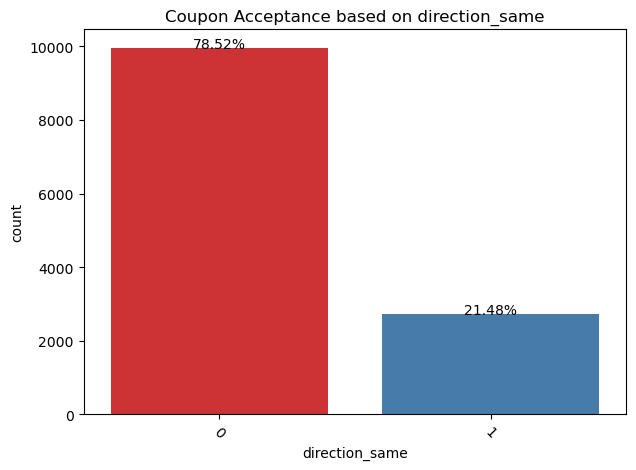

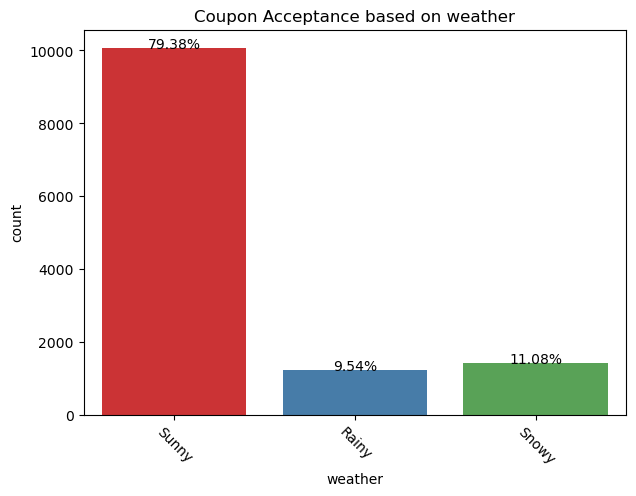

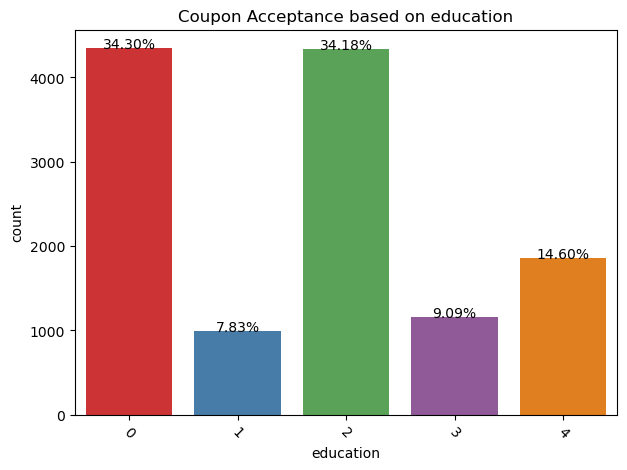

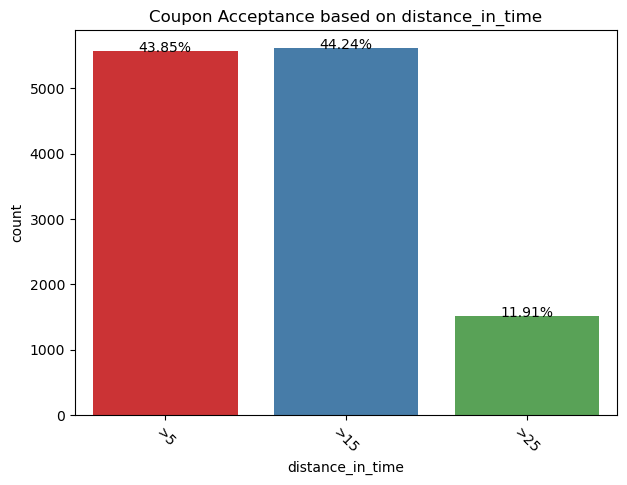

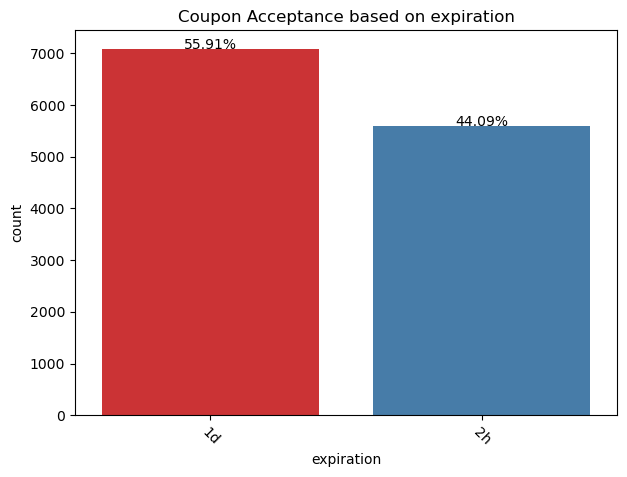

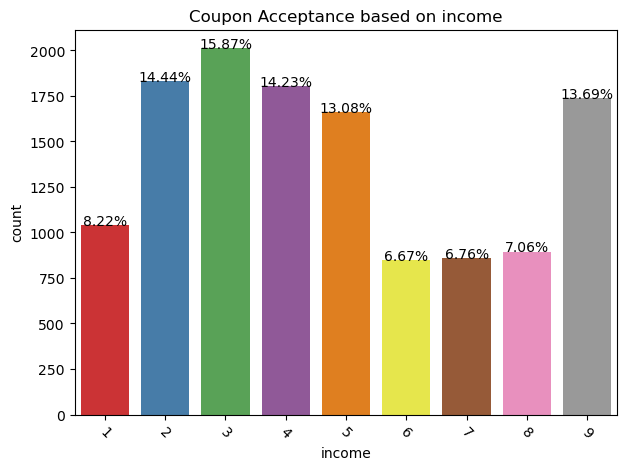

In [25]:
def add_percentage_labels(plot, feature, total_count):
    for p in plot.patches:
        height = p.get_height()
        plot.text(p.get_x() + p.get_width() / 2., height, f'{100 * height / total_count:.2f}%', ha='center')

# Frequency Analysis with Percentage
print("Frequency Analysis:")
for col in nominal_cols+ordinal_cols:
    plt.figure(figsize=(7, 5))
    plot = sns.countplot(data=df, x=col,palette=sns.color_palette("Set1"))
    total_count = len(df)
    add_percentage_labels(plot, col, total_count)
    plt.title(f'Coupon Acceptance based on {col}')
    plt.xticks(rotation=315)
    plt.show()

Based on the frequency analysis, it looks like there is skew in dsitribution for many cateogory of drivers.
1. Destination: Drivers with no Urgent Diestinations have accepted coupons in comparison to other directions.
2. Count of Passangers: Drivers travelling alone accept coupons in comparsion to others.
3. Income: There is no clear indication seen amongst coupon acceptance based on the income.
4. Distance: The coupons of restaurants at closer distances are accepted more by the drivers.
5. Education: People with no college degree or a Bachelor's Degree have accepeted higher number of coupons

In [26]:
# One Hot encoding all the categorical columns left over.
df = pd.get_dummies(df, drop_first = True, prefix_sep = "_")

In [27]:
df.to_csv("preprocessed_data.csv", index = False)